Pokemon is a famous japanese anime where Pokemon masters catch different types of pokemon and fight against each other.
I used to watch every evening this masterpiece and always gets amazed by the creativity of the creators of this anime.
Now, one thing i still remember is there used to be a device names `Pokedex` to every masters who use this device to get
information about the new pokemon species they don't know. How this device works? Well , masters point the device to a pokemon,
the device capture images of the pokemon and tell all details abouth the pokemon.

Hmm, such an interesting device. I'm gonna use my DataScience skills to make my own `Pokedex`. This sounds interesting how we build such a device? What about training bunch of `Pokemon` images and then using
the same model we will predict `Pokemons`.
For this project we need pokemon images, and kaggle have lots of pokemon related datasets. i'm gonna use this one:
"https://www.kaggle.com/thedagger/pokemon-generation-one"

In [ ]:
#import tensorflow
import tensorflow as tf

I'm using google's colab so, i put zipped dataset to my drive and the following code shows how to unzip it from drive.
However, if you are using local machine you can unzip it and start right away, but the below code still works if you want python
to unzip your dataset

In [ ]:
import zipfile

poke_zip = zipfile.ZipFile("/content/drive/MyDrive/Datasets/pokemon/archive.zip") # path to the dataset
poke_zip.extractall() # extracting the dataset
poke_zip.close()

Now i'll make some directories. Basically, we want our dataset to be split in train and test
dataset and we making directories for that

In [ ]:
#Create folders
import os
base_dir = "Data/"
test_dir = os.path.join(base_dir,"test")
train_dir = os.path.join(base_dir, "train")
folders = list(os.listdir("PokemonData"))
len(folders)

151

In [ ]:
folders = list(os.listdir("PokemonData"))
len(folders)

151

In [ ]:
#creating directories for our train and test dataset
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(test_dir)

In [ ]:
#creating directories for each classes of pokemon in both train and test directory
train_path= []
for fname in folders:
  current_path = os.path.join(train_dir,fname)
  train_path.append(current_path)
  os.mkdir(current_path)
test_path = []
for fname in folders:
  current_path = os.path.join(test_dir,fname)
  train_path.append(current_path)
  os.mkdir(current_path)

In [ ]:
#copy files to train-test folder
import shutil
folder_dir = "PokemonData/"
for fname in folders:
  files = list(os.listdir(folder_dir+fname))
  #print(f"There is {len(files)} files inside {fname} folder")
  test_size = int(len(files)*0.2)
  train_size = int(len(files)*0.8)
  for file in range(1,test_size):
    src = folder_dir + fname +"/"+ fname.replace(".","")+str(file)+".jpg"
    dst = test_dir + "/"+fname + "/"+ fname.replace(".","")+str(file)+".jpg"
    shutil.copy(src,dst)
  for file in range(test_size,train_size):
    src = folder_dir + fname +"/"+ fname.replace(".","")+str(file)+".jpg"
    dst = train_dir + "/"+fname + "/"+ fname.replace(".","")+str(file)+".jpg"
    shutil.copy(src,dst)

In [ ]:
for dirpath, dirnames, filenames in os.walk("Data/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'Data/'
There are 151 directories and 0 images in 'Data/train'
There are 0 directories and 58 images in 'Data/train/Muk'
There are 0 directories and 49 images in 'Data/train/Moltres'
There are 0 directories and 43 images in 'Data/train/Vileplume'
There are 0 directories and 48 images in 'Data/train/Cubone'
There are 0 directories and 36 images in 'Data/train/Starmie'
There are 0 directories and 51 images in 'Data/train/Raichu'
There are 0 directories and 54 images in 'Data/train/Dragonair'
There are 0 directories and 51 images in 'Data/train/Nidoran-m'
There are 0 directories and 54 images in 'Data/train/Golbat'
There are 0 directories and 41 images in 'Data/train/Vulpix'
There are 0 directories and 43 images in 'Data/train/Rhydon'
There are 0 directories and 62 images in 'Data/train/Pikachu'
There are 0 directories and 39 images in 'Data/train/Parasect'
There are 0 directories and 39 images in 'Data/train/Caterpie'
There are 0 directories and 39

### Visualizations

Let's visualize some pokemons  

In [ ]:
#view images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")

['Jigglypuff15.jpg']
Image shape: (343, 343, 3)


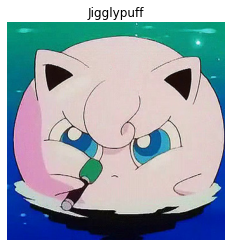

In [ ]:
view_random_image("Data/train/","Jigglypuff")

['Scyther38.jpg']
Image shape: (1296, 1296, 3)


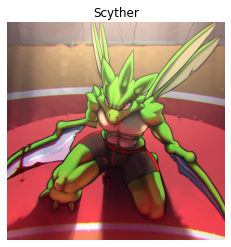

In [ ]:
view_random_image("Data/train/","Scyther")

['Pikachu25.jpg']
Image shape: (506, 506, 3)


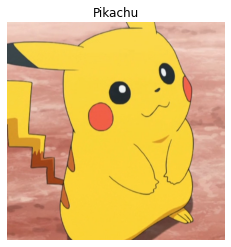

In [ ]:
view_random_image("Data/train/","Pikachu")

Next we will create our train and test data for our model.

In [ ]:
#importing imagedatafenerator
from keras.preprocessing.image import ImageDataGenerator

#augmented train datagenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

#test data generator
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_data = train_datagen.flow_from_directory("Data/train/",
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode = "categorical") #creation of train data
test_data = test_datagen.flow_from_directory("Data/test/",
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = "categorical") #creation of test data

Found 7171 images belonging to 151 classes.
Found 2178 images belonging to 151 classes.


In [ ]:
#we use labels as key and names as value
classes = {}
for k,v in train_data.class_indices.items():
  classes[v] =k

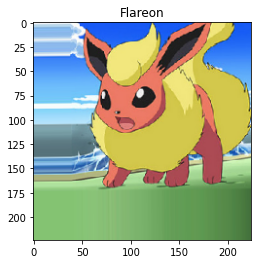

In [ ]:
import numpy as np

img, label = train_data.next()

plt.imshow(img[0])
plt.title(classes[np.argmax(label[0])])
plt.show();

Time to create very first model and train the data to see how good our pokedex can predict

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D(strides = 2),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D(strides = 2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(151, activation = 'softmax')
])

#compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 32)       128       
 ormalization)                                                   
                                                        

In [ ]:
#create a callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 5)

#fit the model
history_1 = model_1.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs=100,
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [early_stopping])

Epoch 1/100
225/225 [==============================] - 173s 726ms/step - loss: 5.0407 - accuracy: 0.0099 - val_loss: 4.9215 - val_accuracy: 0.0156
Epoch 2/100
225/225 [==============================] - 162s 721ms/step - loss: 4.7802 - accuracy: 0.0231 - val_loss: 4.9524 - val_accuracy: 0.0207
Epoch 3/100
225/225 [==============================] - 162s 720ms/step - loss: 4.3876 - accuracy: 0.0399 - val_loss: 4.1199 - val_accuracy: 0.0684
Epoch 4/100
225/225 [==============================] - 159s 708ms/step - loss: 4.0989 - accuracy: 0.0594 - val_loss: 3.8974 - val_accuracy: 0.0900
Epoch 5/100
225/225 [==============================] - 153s 679ms/step - loss: 3.9181 - accuracy: 0.0792 - val_loss: 4.8954 - val_accuracy: 0.0569
Epoch 6/100
225/225 [==============================] - 151s 672ms/step - loss: 3.7960 - accuracy: 0.0985 - val_loss: 3.4268 - val_accuracy: 0.1708
Epoch 7/100
225/225 [==============================] - 153s 680ms/step - loss: 3.6585 - accuracy: 0.1143 - val_loss: 3

45.55% accuracy, our pokedex right now can't even predict 50% correctly.
After, 35 epochs it stopped automatically because our val_loss was not improving, so the callback end our model training there
Time to visualize training vs validation data performance

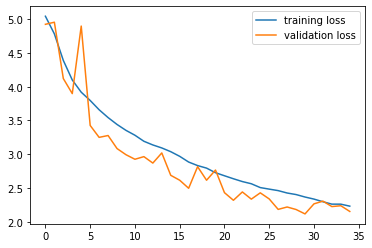

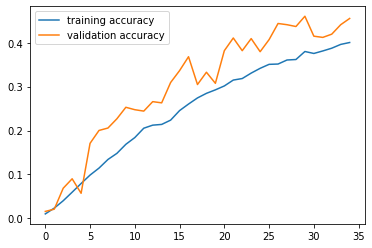

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
epochs = range(len(loss))
plt.plot(epochs,loss,label = "training loss")
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(epochs,acc,label = "training accuracy")
plt.plot(epochs,val_acc, label = "validation accuracy")
plt.legend()
plt.show()

It's certainly not overfitting, but it's underfitting. if we look at the training epochs, it achieves 40% accuracy on training data.
It clearly indicates our model learnt nothing. As, it is not overfitting, so in our next model we add some layers to see if our accuracy
increases or not

For, our next model we try using Transfer Learning, as our dataset very small, not a single pokemon class have 100 images,
one of the major reason why our first model failed.

In [ ]:
#import tensorflow hub
import tensorflow_hub as hub

#create a function to create a model
def create_model(url, classes = 151):
  mobilenet_model = hub.KerasLayer(urls,
                                   trainable = False,
                                   input_shape = (224,224,3))
  new_model = tf.keras.models.Sequential([
    mobilenet_model,
    tf.keras.layers.Dense(151,activation = 'softmax')
  ])
  return new_model

In [ ]:
#from tensorflow_hub
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_050_224/feature_vector/5"

#create mobilenet model
mobilenet_model = create_model(model_url=mobilenet_url)

In [ ]:
mobilenet_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['accuracy'])

In [ ]:
history_3 = mobilenet_model.fit(train_data,
                                epochs = 10,
                                steps_per_epoch = len(train_data),
                                validation_data = test_data,
                                validation_steps = len(test_data))

Epoch 1/10
225/225 [==============================] - 159s 689ms/step - loss: 3.2032 - accuracy: 0.3403 - val_loss: 1.9353 - val_accuracy: 0.5771
Epoch 2/10
225/225 [==============================] - 154s 683ms/step - loss: 1.3975 - accuracy: 0.6985 - val_loss: 1.3890 - val_accuracy: 0.6662
Epoch 3/10
225/225 [==============================] - 152s 674ms/step - loss: 0.9604 - accuracy: 0.7861 - val_loss: 1.1735 - val_accuracy: 0.7181
Epoch 4/10
225/225 [==============================] - 152s 677ms/step - loss: 0.7322 - accuracy: 0.8368 - val_loss: 1.1136 - val_accuracy: 0.7296
Epoch 5/10
225/225 [==============================] - 152s 676ms/step - loss: 0.5767 - accuracy: 0.8744 - val_loss: 1.0644 - val_accuracy: 0.7337
Epoch 6/10
225/225 [==============================] - 154s 683ms/step - loss: 0.4856 - accuracy: 0.8893 - val_loss: 1.0213 - val_accuracy: 0.7456
Epoch 7/10
225/225 [==============================] - 153s 680ms/step - loss: 0.4120 - accuracy: 0.9145 - val_loss: 0.9823 -

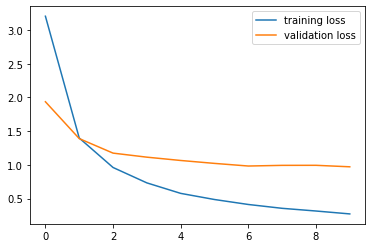

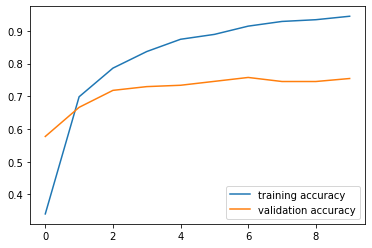

In [ ]:
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
epochs = range(len(loss))
plt.plot(epochs,loss,label = "training loss")
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(epochs,acc,label = "training accuracy")
plt.plot(epochs,val_acc, label = "validation accuracy")
plt.legend()
plt.show()

In [ ]:
mobilenet_model.save("pokemon_mobilenet_model.h5")

Well 75% accuracy not so good but definitly far better than our first model which have only 45% accuracy.
From, the graphs it also seems that our second model not generalizing well on unknown dataset, because training accuracy
reached 94.5% but on validation set only 75%, that's pretty huge gap.